# Andres Delgadillo
# Project Supervised Learning : Classification

## 1 Project: Personal Loan Campaign Modeling

### 1.1 Objective
- To predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.

### 1.2 Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?


## 2 Import packages and turnoff warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
sns.set(color_codes=True)
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


## 3 Import dataset and quality of data

In [2]:
# read data from csv file
data = pd.read_csv('Loan_Modelling.csv')

In [3]:
# get columns
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [4]:
# get size of dataset
data.shape

(5000, 14)

In [5]:
# check dataset information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# check dataset missing values
total = data.isnull().sum().sort_values(ascending=False) # total number of null values
print(total)

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


In [7]:
# check for duplicates
data.duplicated().sum()

0

All columns are numeric and there are not missing values or duplicated rows

## 4 Exploratory Data Analysis

In [8]:
# check first rows of data
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [9]:
data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### 4.1 Pandas profiling report
We can get a first statistical and descriptive analysis using pandas_profiling

In [10]:
# get pandas profiling report
pandas_profiling.ProfileReport(data)

Pandas Profiling report is showing some warnings/characteristics in the data:
- Age and Experience are highly correlated.
- ID is uniformly distributed and all values are unique. We can drop this column.
- ZIPCode is numerical but it should be treated as categorical.
- Experience has negative values. 
- Mortgage column has 69.2% of rows with 0 value

### 4.2 Univariate Analysis

In [11]:
# get stats for the columns
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

#### 4.2.1 Age
- Age is between 23 to 67
- Mean is 45.3 and median 45
- There are not outliers or missing values

#### 4.2.2 Experience
- There are 55 rows with negative values, by definition the minimum value should be 0 years of professional experience. These values are outliers.
- Mean is 20.1, median 20, and max 43

#### 4.2.3 Income
- The range is 216 thousand dollars with min value of 8 thousand and max of 224
- Mean is 73.7 thousand and median 64
- The distribution is skewed to the right
- There are not outliers or missing values

#### 4.2.4 Family
- There are 4 different sizes being 1 the most frequent with 29.4% rows and 3 the least frequent with 20.2% rows

#### 4.2.5 CCAvg
- Average spending credit cards range is 10 thousand dollars with min value of 0 and max of 10 thousand
- Mean is 1.93 thousand and median 1.5
- The distribution is skewed to the right
- There are not outliers or missing values

#### 4.2.6 Education
- There are 3 different categories being 1 (Undergrad) the most frequent with 41.9% rows and 2 (Graduate) the least frequent with 28.1% rows

#### 4.2.7 Mortgage
- The range is 635 thousand dollars with min value of 0 and max of 635 thousand
- The mean is 56.5 thousand and median 0
- The distribution is skewed to the right
- There are 69.2% rows with value equal to 0. This means that there are 69.2% of customers without any mortgage.

#### 4.2.8 Personal_Loan 
- There are 2 categories
- 90.4% customers did not accept a personal loan last campaign, and 9.6% did

#### 4.2.9 Securities_Account
- There are 2 categories
- 89.6% customers do not have a securities account with the bank, and 10.4% have

#### 4.2.10 CD_Account
- There are 2 categories
- 94% customers do not have a CD account with the bank, and 6% have

#### 4.2.11 Online
- There are 2 categories
- 59.7% customers use online banking facilities, and 40.3 do not

#### 4.2.12 CreditCard
- There are 2 categories
- 70.6% customers do not use credit cards issued by any other bank, and 29.4% do


### 4.3 Pairplot.
We are going to perform bivariate analysis to understand the relationship between the columns

In [12]:
# Continuous columns + Personal_Loan
con_col = ['Age','Experience','Income','CCAvg','Mortgage','Personal_Loan']
# Categorical columns
cat_col = ['ZIPCode','Family','Education','Securities_Account','CD_Account','Online','CreditCard', 'Personal_Loan']

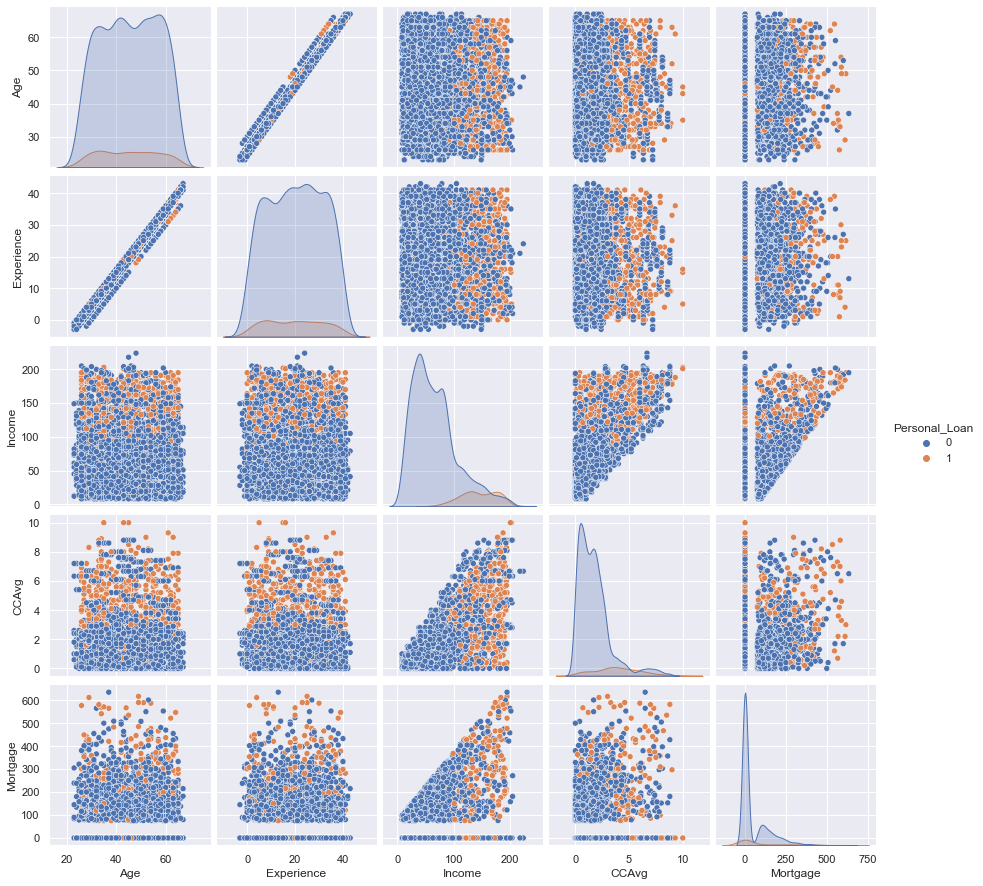

In [13]:
# Pairplot for continuous columns
sns.pairplot(data[con_col], diag_kind='kde', hue='Personal_Loan');

### 4.4 Bivariate and Multivariate Analysis

In [14]:
# Get correlation matrix for numeric variables
data[con_col].corr()

Age  Experience    Income     CCAvg  Mortgage  \
Age            1.000000    0.994215 -0.055269 -0.052012 -0.012539   
Experience     0.994215    1.000000 -0.046574 -0.050077 -0.010582   
Income        -0.055269   -0.046574  1.000000  0.645984  0.206806   
CCAvg         -0.052012   -0.050077  0.645984  1.000000  0.109905   
Mortgage      -0.012539   -0.010582  0.206806  0.109905  1.000000   
Personal_Loan -0.007726   -0.007413  0.502462  0.366889  0.142095   

               Personal_Loan  
Age                -0.007726  
Experience         -0.007413  
Income              0.502462  
CCAvg               0.366889  
Mortgage            0.142095  
Personal_Loan       1.000000

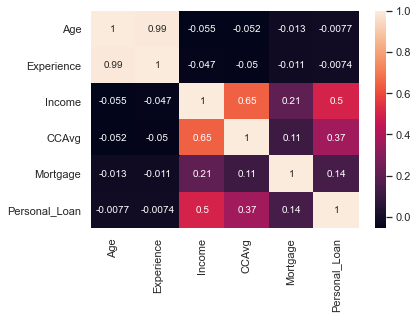

In [15]:
# Display correlation matrix in a heatmap
sns.heatmap(data[con_col].corr(), annot=True);

- Age and experience are highly correlated (0.99)
- Income and Average spending on credit cards are positive correlated (0.65)
- Income and Personal Loan are positive correlated (0.5)

#### 4.4.1 Income and Personal Loan

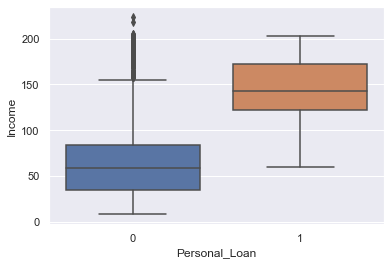

In [16]:
# create boxplot chart
sns.boxplot(data['Personal_Loan'],data['Income']);

- Customers with personal loan tend to have higher income than customers without personal loan

#### 4.4.2 Age and Personal Loan

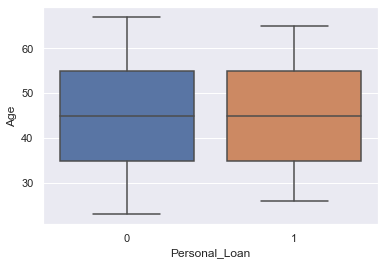

In [17]:
# create boxplot chart
sns.boxplot(data['Personal_Loan'],data['Age']);

- There is not an Age difference between customers with and without personal loan

#### 4.4.3 CCAvg and Personal Loan

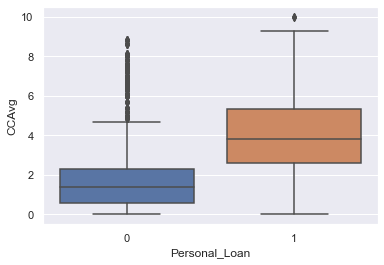

In [18]:
# create boxplot chart
sns.boxplot(data['Personal_Loan'],data['CCAvg']);

- Customers with personal loan tend to have higher spending on credit cards than customers without personal loan

#### Mortgage and Personal Loan

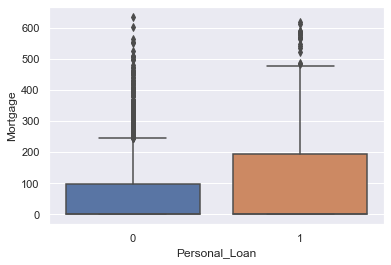

In [19]:
# create boxplot chart
sns.boxplot(data['Personal_Loan'],data['Mortgage']);

- Customers with personal loan tend to have higher mortgage than customers without personal loan

#### 4.4.5 Family and Personal Loan

In [20]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x,hue):
    sns.set()
    ## visualising the cross tab
    tab = pd.crosstab(x,hue,normalize='index').sort_values(by=hue[0])
    tab.plot(kind='bar',stacked=True)
    plt.show()

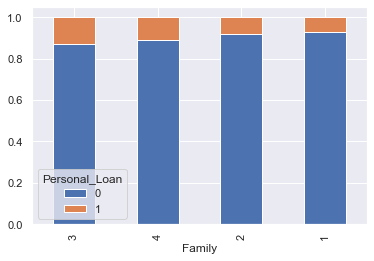

In [21]:
stacked_plot(data['Family'], data['Personal_Loan'])

- The proportion of customers with personal loan is higher in customers with family size in groups 3 and 4 than groups 1 and 2

#### 4.4.6 Education and Personal Loan

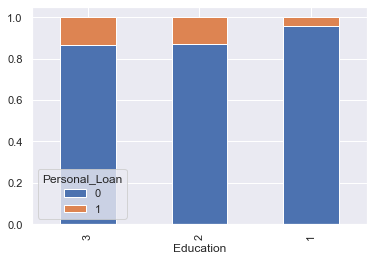

In [22]:
stacked_plot(data['Education'], data['Personal_Loan'])

- The proportion of customers with personal loan is higher in Professional and Graduate customers than Undergrad customers

#### 4.4.7 Securities Account and Personal Loan

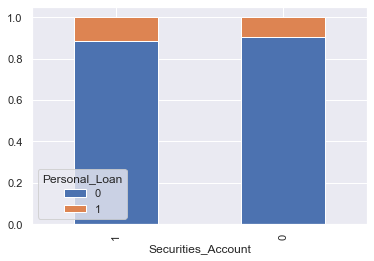

In [23]:
stacked_plot(data['Securities_Account'], data['Personal_Loan'])

- The proportion of customers with personal loan is higher in customers with Securities Account


#### 4.4.8 CD Account and Personal Loan

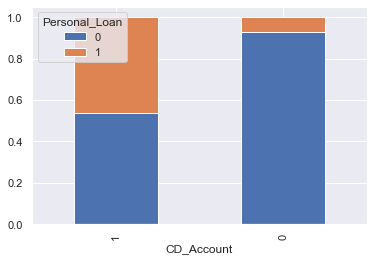

In [24]:
stacked_plot(data['CD_Account'], data['Personal_Loan'])

- The proportion of customers with personal loan is higher in customers with CD Account

#### 4.4.9 Online banking and Personal Loan

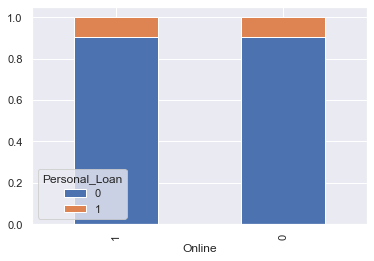

In [25]:
stacked_plot(data['Online'], data['Personal_Loan'])

- There is not a clear difference between customers that use Online banking and customers that do not 


#### 4.4.10 Credit Card and Personal Loan

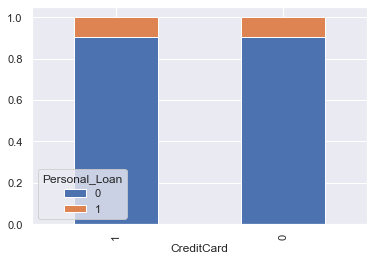

In [26]:
stacked_plot(data['CreditCard'], data['Personal_Loan'])

- There is not a clear difference between customers with Credit Cards from other banks and customers without Credit Cards

## 5 Data Pre-Processing

- Drop ID column
- Drop Experience column (highly correlated with Age)
- Change ZIPCode as categorical
- Mortgage column has 69.2% rows with value equal to 0. We are going to convert Mortgage column in 3 categories: 0 - No Mortgage, 1 - Low Mortgage, 2 - High Mortgage


In [27]:
# Drop ID column
data.drop(['ID'], axis=1, inplace=True)
# Drop Experience column
data.drop(['Experience'], axis=1, inplace=True)

In [28]:
# Change ZIPCode as categorical
data['ZIPCode']=data['ZIPCode'].astype('category')

### 5.1 Mortgage

In [29]:
# calculate mean of mortgage of rows different than zero
mortgage_mean = data['Mortgage'][data['Mortgage']>0].mean()
# create Mortage categories
data['Mortgage_cat'] = 0 # Category 0 - No Mortgage
data['Mortgage_cat'][(data['Mortgage']>0) & (data['Mortgage']<mortgage_mean)] = 1 # Category 1 - Low Mortgage
data['Mortgage_cat'][data['Mortgage']>=mortgage_mean] = 2 # Category 2 - High Mortgage

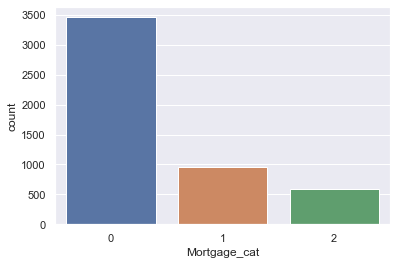

In [30]:
# check data distribution
sns.countplot(data['Mortgage_cat']);

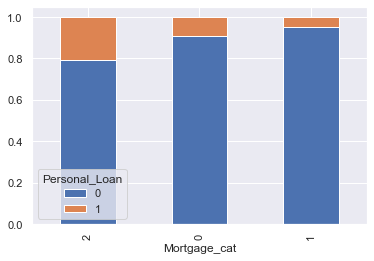

In [31]:
# Relationship between Mortgage categories and Personal Loan
stacked_plot(data['Mortgage_cat'], data['Personal_Loan'])

Now, we can keep Mortgage_cat column and drop the mortgage column

In [32]:
# Drop Mortgage column
data.drop(['Mortgage'], axis=1, inplace=True)

In [33]:
# check data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Income              5000 non-null   int64   
 2   ZIPCode             5000 non-null   category
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   int64   
 6   Personal_Loan       5000 non-null   int64   
 7   Securities_Account  5000 non-null   int64   
 8   CD_Account          5000 non-null   int64   
 9   Online              5000 non-null   int64   
 10  CreditCard          5000 non-null   int64   
 11  Mortgage_cat        5000 non-null   int64   
dtypes: category(1), float64(1), int64(10)
memory usage: 459.4 KB


### 5.2 Skewed distributions and Outliers detection
Income and CCAVG have skewed distributions that can affect the performance of the model. We are going to analyze whether the distributions are caused by outliers or a log transformation would improve the distributions

In [34]:
# This function print the skewnees of the series and create a plot with the boxplot and distribution of the series and the log transformation
def histboxplot(feature):
    print(f'Skew: {feature.skew()}')
    print(f'Skew log transformation: {np.log(feature+1).skew()}')
    
    # creating the 4 subplots
    f2, ((ax_box1, ax_box2), (ax_hist1, ax_hist2)) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           ncols = 2, # Number of Columns of the subplot grid= 2
                                           sharex = 'col', # x-axis will be shared among columns
                                           figsize = (14,6),
                                           gridspec_kw = {"height_ratios": (.25, .75)});
    sns.boxplot(feature, ax=ax_box1, showmeans=True, color='violet'); # boxplot 
    sns.distplot(feature, kde=True, ax=ax_hist1); # histogram
    ax_hist1.axvline(np.mean(feature), color='green', linestyle='--'); # Add mean to the histogram
    ax_hist1.axvline(np.median(feature), color='black', linestyle='-');
    
    ### Log transformation
    sns.boxplot(np.log(feature+1), ax=ax_box2, showmeans=True, color='violet'); # boxplot 
    sns.distplot(np.log(feature+1), kde=True, ax=ax_hist2); # histogram
    ax_hist2.axvline(np.mean(np.log(feature+1)), color='green', linestyle='--'); # Add mean to the histogram
    ax_hist2.axvline(np.median(np.log(feature+1)), color='black', linestyle='-');


#### 5.2.1 Age

Skew: -0.02934068151284029
Skew log transformation: -0.37056399375750343


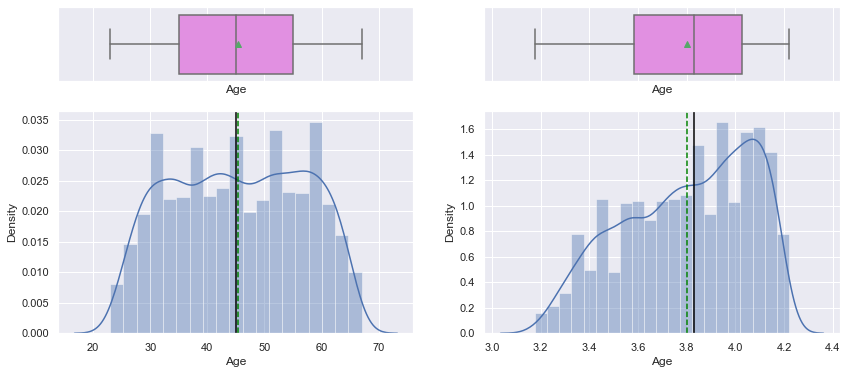

In [35]:
# distributions for Age
histboxplot(data['Age'])

Age column is not skewed and there are not outliers. We will keep the column without transformation

#### 5.2.2 Income

Skew: 0.8413386072610816
Skew log transformation: -0.42071189305490625


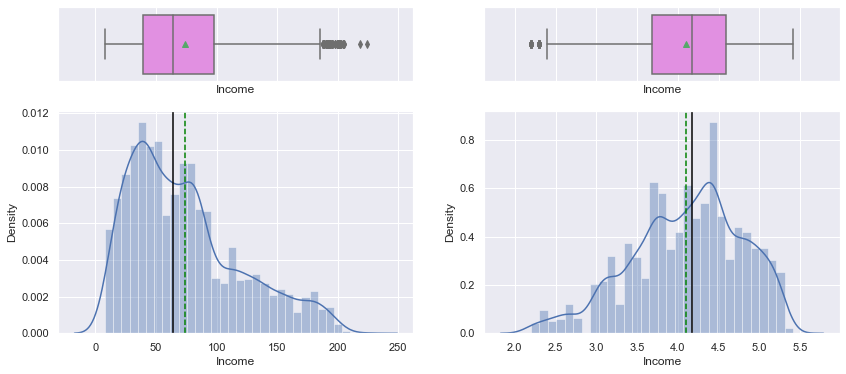

In [36]:
# distributions for Income
histboxplot(data['Income'])

- The log transformation distribution is less skewed
- The income distribution has some values above the upper whisker, while
- The log transformation has some values smaller than the lower whisker

We will keep the log transformation for the Income column

In [37]:
# Log transformation
data['Income_log']=np.log(data['Income'])
# Drop Income column
data.drop(['Income'], axis=1, inplace=True)

#### 5.2.3 CCAvg

Skew: 1.5984433366678663
Skew log transformation: 0.31922379644464305


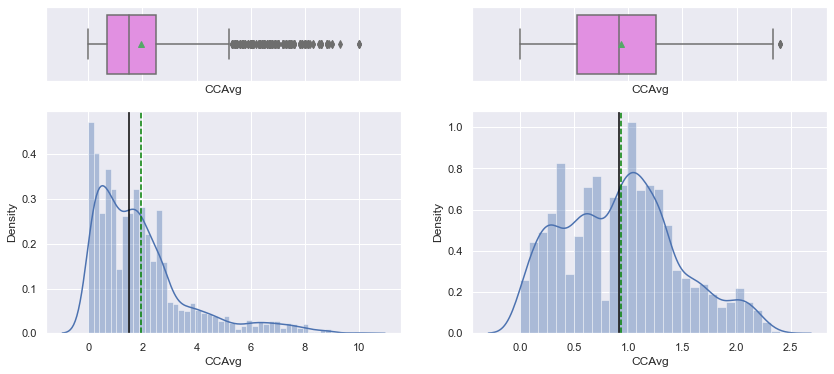

In [38]:
# distributions for CCAvg
histboxplot(data['CCAvg'])

- The log transformation distribution is less skewed
- The CCAvg distribution has some values above the upper whisker
- The log transformation has some values above the upper whisker

We will keep the log transformation for the CCAvg column

In [39]:
# Log transformation
data['CCAvg_log']=np.log(data['CCAvg']+1)
# Drop Income column
data.drop(['CCAvg'], axis=1, inplace=True)

### 5.3 Outliers treatment
For Income_log and CCAvg_log columns, values smaller than the lower whisker will be assigned the value of the lower whisker, and values above the upper whisker will be assigned the value of the upper whisker.

In [40]:
# This function treat the outliers in the column
def treat_outliers(data,col):
    '''
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
    # and all the values above upper_whisker will be assigned value of upper_Whisker 
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) 
    # return data
    return data


In [41]:
data = treat_outliers(data,'Income_log')
data = treat_outliers(data,'CCAvg_log')

### 5.4 Data Preparation

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   ZIPCode             5000 non-null   category
 2   Family              5000 non-null   int64   
 3   Education           5000 non-null   int64   
 4   Personal_Loan       5000 non-null   int64   
 5   Securities_Account  5000 non-null   int64   
 6   CD_Account          5000 non-null   int64   
 7   Online              5000 non-null   int64   
 8   CreditCard          5000 non-null   int64   
 9   Mortgage_cat        5000 non-null   int64   
 10  Income_log          5000 non-null   float64 
 11  CCAvg_log           5000 non-null   float64 
dtypes: category(1), float64(2), int64(9)
memory usage: 459.4 KB


#### 5.4.1 Creating training and test data sets

In [43]:
# create independent variables
X = data.drop(['Personal_Loan'], axis=1)
# create dependent variable
Y = data['Personal_Loan']

# hot encoding for categorical variables
X = pd.get_dummies(X,drop_first=True)

In [44]:
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

In [45]:
print(f'Shape of Training set: {X_train.shape}')
print(f'Shape of Test set: {X_test.shape}')
print(f'Percentage of classes in Training set\n{y_train.value_counts(normalize=True)}')
print(f'Percentage of classes in Test set\n{y_test.value_counts(normalize=True)}')

Shape of Training set: (3500, 476)
Shape of Test set: (1500, 476)
Percentage of classes in Training set
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in Test set
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


Both, training set and test set have similar ratios of classes for Personal_Loan

## 6 Models evaluation criteria

### 6.1 Insights:

- **True Positives:**
    - Reality: The customer converted from Liability customer to Personal Loan customer
    - Model predicted: The customer has a Personal Loan 
    - Outcome: The model is good

- **True Negatives:**
    - Reality: The customer did not convert from Liability customer to Personal Loan customer
    - Model predicted: The customer does not have a Personal Loan
    - Outcome: The business is unaffected

- **False Positives:**
    - Reality: The customer did not convert from Liability customer to Personal Loan customer
    - Model predicted: The customer has a Personal Loan 
    - Outcome: AllLife Bank is wasting resources on the customers who will not be contributing to the revenue

- **False Negatives:**
    - Reality: The customer converted from Liability customer to Personal loan customer
    - Model predicted: The customer does not have a Personal Loan
    - Outcome: The potential customer is missed by AllLife Bank, and the Personal Loan business would not grow


#### 6.1.1 Model can make wrong predictions as:
1. Predicting a customer has a Personal Loan but actually the customer does not have a Personal Loan
2. Predicting a customer does not have a Personal Loan but actually the customer has a Personal Loan

#### 6.1.2 Which case is more important? 
- Case 2 is more important because AllLife Bank needs to target and identify customers with Personal Loan in order to grow the business. Therefore, we would like to minimize False Negatives

#### 6.1.3 How to reduce this loss i.e need to reduce False Negatives?
*  `Recall` should be used as a measured of the model performance. High recall implies low False Negatives

### 6.2 Functions to evaluate models
- metrics_score: check the model performance of models. 
- make_confusion_matrix: plot confusion matrix.

In [46]:
def metrics_score(model,train,test,train_y,test_y,threshold=0.5,model_name=''):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    model_name: name of model
    '''
    
    pred_train = (model.predict_proba(train)[:,1]>threshold)
    pred_test = (model.predict_proba(test)[:,1]>threshold)

    score_dict = {'Model':model_name,
                  'Accuracy on training set' : accuracy_score(pred_train,train_y),
                  'Accuracy on test set': accuracy_score(pred_test,test_y),
                  'Recall on training set': recall_score(train_y,pred_train),
                  'Recall on test set': recall_score(test_y,pred_test),
                  'Precision on training set': precision_score(train_y,pred_train),
                  'Precision on test set': precision_score(test_y,pred_test),
                  'F1 on training set': f1_score(train_y,pred_train),
                  'F1 on test set': f1_score(test_y,pred_test),
                  'ROC-AUC on training set': roc_auc_score(train_y,pred_train),
                  'ROC-AUC Score on test set': roc_auc_score(test_y,pred_test)
                 }
    return score_dict # returning dictionary with scores

In [47]:
def make_confusion_matrix(model,test_X,y_actual,threshold=0.5,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth  
    threshold: thresold for classifiying the observation as 1
    '''
    y_predict = (model.predict_proba(test_X)[:, 1] > threshold).astype('float')
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, 
                         index = ['Actual - Personal Loan','Actual - No Personal Loan'],
                         columns = ['Predicted-Personal Loan','Predicted-No Personal Loan'])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]
    group_labels = ['(TP)', '(FN)', '(FP)', '(TN)']
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_counts,group_percentages,group_labels)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (8,6))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 7 Logistic Regression

In [48]:
# Create Logistic regression model ussing newton-cg solver
lg = LogisticRegression(solver='newton-cg',random_state=1)

# Fit the model with training data
model  = lg.fit(X_train,y_train)

# checking model performances for this model
scores_LR = metrics_score(model,X_train,X_test,y_train,y_test,model_name='Logistic Regression')
scores = pd.DataFrame(scores_LR,index=[0])
scores

Model  Accuracy on training set  Accuracy on test set  \
0  Logistic Regression                     0.966                  0.95   

   Recall on training set  Recall on test set  Precision on training set  \
0                0.719033            0.597315                   0.901515   

   Precision on test set  F1 on training set  F1 on test set  \
0               0.855769                 0.8        0.703557   

   ROC-AUC on training set  ROC-AUC Score on test set  
0                 0.855414                   0.793106

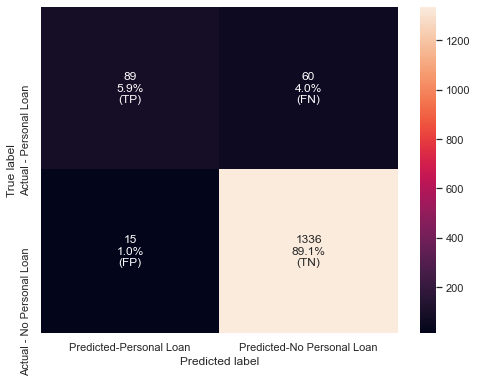

In [49]:
# creating confusion matrix
make_confusion_matrix(lg,X_test,y_test)

- The overall performance of the model is good
- The model is not overfitting. Accuracy on training and test set is similar
- The model correctly predicts 95% of the data in the test set
- The main difference is on Recall. Recall in the training set is 0.719 and in test set is 0.59

### 7.1 ROC-AUC
Now we are going to analyze the ROC-AUC in the training and test sets
#### 7.1.1 Training set

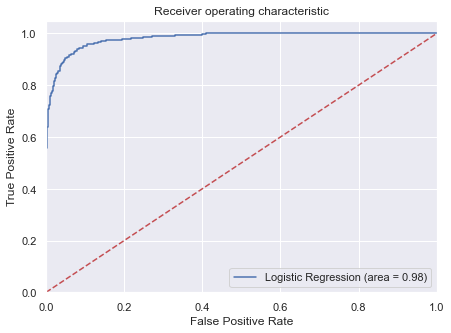

In [50]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### 7.1.2 Test set

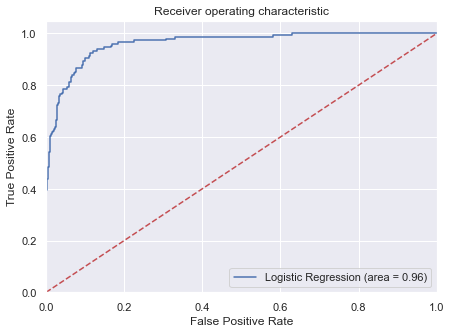

In [51]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

- Logistic Regression model is giving a good performance on training and test sets
    - AUC training set = 0.98
    - AUC test set = 0.96

### 7.2 Coefficients
Now we are going to determine the coefficients for each variable

In [52]:
# get the coeffients for each variable
coefficients = pd.DataFrame(lg.coef_[0], X_train.columns, columns=['coef'])
coefficients

coef
Age                 6.249635e-03
Family              7.028428e-01
Education           1.586943e+00
Securities_Account -8.843818e-01
CD_Account          3.171157e+00
...                          ...
ZIPCode_96091      -8.710852e-02
ZIPCode_96094      -4.120086e-03
ZIPCode_96145      -4.217946e-08
ZIPCode_96150      -7.194551e-02
ZIPCode_96651      -4.611562e-05

[476 rows x 1 columns]

#### 7.2.1 Coefficients with Positive Impact

In [53]:
# Get variables with positive impact
coefficients['coef'][coefficients['coef']>0].head(20)

Age              0.006250
Family           0.702843
Education        1.586943
CD_Account       3.171157
Mortgage_cat     0.145879
Income_log       5.853310
CCAvg_log        0.944274
ZIPCode_90016    0.025147
ZIPCode_90019    0.253628
ZIPCode_90028    0.468883
ZIPCode_90032    0.038421
ZIPCode_90034    0.270765
ZIPCode_90049    2.086827
ZIPCode_90059    0.054737
ZIPCode_90064    0.366093
ZIPCode_90071    0.156566
ZIPCode_90089    0.128294
ZIPCode_90250    0.422518
ZIPCode_90291    0.705146
ZIPCode_90405    0.301721
Name: coef, dtype: float64

- Coefficients for Age, Family, Education, CD_Account, Mortgage_cat, Income_log, CCAvg_log and several ZIP codes are positive. Positive increase in these will lead to increase in chances of a customer getting a Personal Loan

#### 7.2.2 Coefficients with Negative Impact

In [54]:
# Get variables with negative impact
coefficients['coef'][coefficients['coef']<0].head(20)

Securities_Account   -0.884382
Online               -0.527586
CreditCard           -0.969690
ZIPCode_90007        -0.102710
ZIPCode_90009        -0.239283
ZIPCode_90011        -0.001432
ZIPCode_90018        -0.013439
ZIPCode_90024        -0.547078
ZIPCode_90025        -0.290567
ZIPCode_90027        -0.304767
ZIPCode_90029        -0.122221
ZIPCode_90033        -0.011239
ZIPCode_90035        -0.363985
ZIPCode_90036        -0.013785
ZIPCode_90037        -0.009190
ZIPCode_90041        -0.263195
ZIPCode_90044        -0.000658
ZIPCode_90045        -0.090856
ZIPCode_90048        -0.002805
ZIPCode_90058        -0.080447
Name: coef, dtype: float64

Coefficients for Securities Account, Online, Credit Card and several ZIP codes are negative. Increase in these will lead to decrease in chances of a customer getting a Personal Loan

#### 7.2.3 Coefficients with No Impact

In [55]:
# Get variables with no impact
coefficients['coef'][coefficients['coef']==0]

ZIPCode_90057    0.0
ZIPCode_90068    0.0
ZIPCode_90813    0.0
ZIPCode_91773    0.0
ZIPCode_92116    0.0
ZIPCode_92694    0.0
ZIPCode_93033    0.0
ZIPCode_94970    0.0
ZIPCode_95307    0.0
Name: coef, dtype: float64

There are some Zip Codes with coefficients equal to 0. This zip codes have no impact on a customer getting a Personal Loan

#### 7.2.4 Converting coefficients to odds

The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
- Therefore, odds = exp(b)
- The percentage change in odds is given as odds = (exp(b) - 1) * 100



In [56]:
coefficients['odds'] = np.exp(lg.coef_[0])
coefficients['Change Odds %'] = (np.exp(lg.coef_[0])-1)*100 # finding the percentage change

In [57]:
coefficients.head(20)

coef        odds  Change Odds %
Age                 0.006250    1.006269       0.626921
Family              0.702843    2.019485     101.948547
Education           1.586943    4.888779     388.877931
Securities_Account -0.884382    0.412969     -58.703061
CD_Account          3.171157   23.835039    2283.503926
Online             -0.527586    0.590027     -40.997269
CreditCard         -0.969690    0.379201     -62.079946
Mortgage_cat        0.145879    1.157056      15.705603
Income_log          5.853310  348.385710   34738.570969
CCAvg_log           0.944274    2.570947     157.094663
ZIPCode_90007      -0.102710    0.902388      -9.761177
ZIPCode_90009      -0.239283    0.787192     -21.280773
ZIPCode_90011      -0.001432    0.998569      -0.143114
ZIPCode_90016       0.025147    1.025466       2.546590
ZIPCode_90018      -0.013439    0.986651      -1.334939
ZIPCode_90019       0.253628    1.288692      28.869177
ZIPCode_90024      -0.547078    0.578638     -42.136203
ZIPCode_90025      -0.290567    0.747839     -25.216089
ZIPCode_90027      -0.304767    0.737295     -26.270508
ZIPCode_90028       0.468883    1.598208      59.820754

#### 7.2.5 Coefficient Interpretation
- `Age`: Holding all other features constant a customer 1 year older will increase the odds of the customer having a Personal Loan by 1.006 times or a 0.62% increase in odds
- `Family`: Holding all other features constant a 1 unit change in Family will increase the odds of a customer having a Personal Loan by 2.02 times or a 101.9% increase in odds
- `Education`: Holding all other features constant a 1 unit change in Education will increase the odds of a customer having a Personal Loan by 4.89 times or a 388.9% increase in odds
- `Securities_Account`: Holding all other features constant a customer with Securities Account will decrease the odds of the customer having a Personal Loan by 0.41 times or a 58.7% decrease in odds
- `CD_Account`: Holding all other features constant a customer with CD Account will increase the odds of a customer having a Personal Loan by 23.83 times or a 2283.5% increase in odds
- `Online`: Holding all other features constant a customer with Online banking will decrease the odds of a customer having a Personal Loan by 0.59 times or a 41% decrease in odds
- `CreditCard`: Holding all other features constant a customert with credit card from other institution will decrease the odds of a customer having a Personal Loan by 0.38 times or a 62% decrease in odds
- `Mortgage_cat`: Holding all other features constant a 1 unit change in Mortgage_cat will increase the odds of a customer having a Personal Loan by 1.15 times or a 15.7% increase in odds
- `Income_log`: Holding all other features constant a 1 unit change in Income_log will increase the odds of a customer having a Personal Loan by 348.4 times or a 34738% increase in odds. It is important to note that this model is using the logarithm of the Income
- `CCAvg_log`: Holding all other features constant a 1 unit change in CCAvg_log will increase the odds of a customer having a Personal Loan by 2.57 times or a 157% increase in odds. It is important to note that this model is using the logarithm of the CCAvg





### 7.3 Model Performance Improvement
The Recall values in the train set and test set can be higher. Higher Recall value implies lower number of False Negative. 

#### 7.3.1 Optimal threshold using AUC-ROC curve

In [58]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.07598225613231822


In [59]:
scores_LR = metrics_score(lg,X_train,X_test,y_train,y_test,threshold=optimal_threshold_auc_roc,model_name='AUC-ROC')
scores = scores.append(scores_LR, ignore_index=True)
scores

Model  Accuracy on training set  Accuracy on test set  \
0  Logistic Regression                  0.966000              0.950000   
1              AUC-ROC                  0.886857              0.885333   

   Recall on training set  Recall on test set  Precision on training set  \
0                0.719033            0.597315                   0.901515   
1                0.960725            0.926174                   0.453638   

   Precision on test set  F1 on training set  F1 on test set  \
0               0.855769            0.800000        0.703557   
1               0.461538            0.616279        0.616071   

   ROC-AUC on training set  ROC-AUC Score on test set  
0                 0.855414                   0.793106  
1                 0.919933                   0.903502

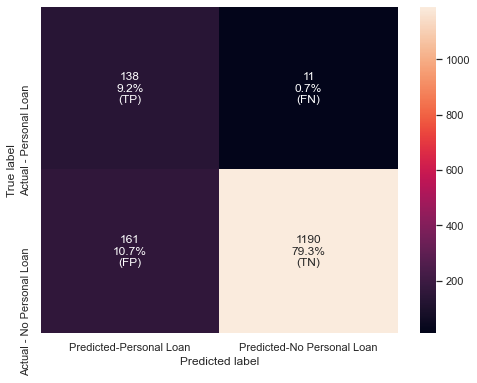

In [60]:
# creating confusion matrix
make_confusion_matrix(lg,X_test,y_test,optimal_threshold_auc_roc)

- Recall on training and test sets improves considerably. However, accuracy, precision and F1 score are lower. This is an expected result, higher value for Recall means lower value for precision.

#### 7.3.2 Precision-Recall curve

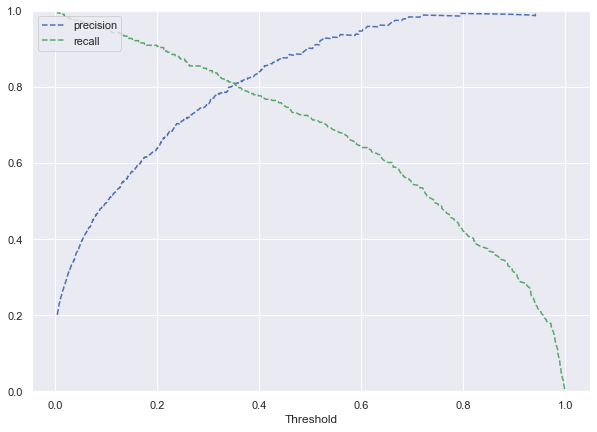

In [61]:
y_scores=lg.predict_proba(X_train)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))    
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [62]:
# find optimal threshold. 
# The optimal threshold is defined as the intersection point between Recall and Precision curves
i = 0
while rec[i]>prec[i]:
    i += 1
print(tre[i],rec[i], prec[i])
optimal_threshold_curve = tre[i]

0.3519664749658232 0.8096676737160121 0.8096676737160121


In [63]:
scores_LR = metrics_score(lg,X_train,X_test,y_train,y_test,threshold=optimal_threshold_curve,model_name='Precision-Recall Curve')
scores = scores.append(scores_LR, ignore_index=True)
scores

Model  Accuracy on training set  Accuracy on test set  \
0     Logistic Regression                  0.966000              0.950000   
1                 AUC-ROC                  0.886857              0.885333   
2  Precision-Recall Curve                  0.963714              0.942000   

   Recall on training set  Recall on test set  Precision on training set  \
0                0.719033            0.597315                   0.901515   
1                0.960725            0.926174                   0.453638   
2                0.806647            0.651007                   0.809091   

   Precision on test set  F1 on training set  F1 on test set  \
0               0.855769            0.800000        0.703557   
1               0.461538            0.616279        0.616071   
2               0.734848            0.807867        0.690391   

   ROC-AUC on training set  ROC-AUC Score on test set  
0                 0.855414                   0.793106  
1                 0.919933                   0.903502  
2                 0.893383                   0.812550

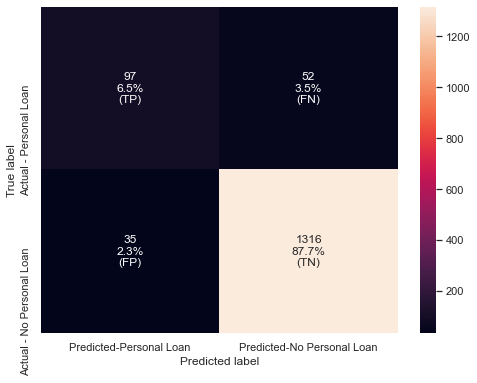

In [64]:
# creating confusion matrix
make_confusion_matrix(lg,X_test,y_test,optimal_threshold_curve)

#### 7.3.3 Sequential Feature Selection
The original model has 476 independent variables. We are going to use Sequential Feature Selection to get the 35 most important features, and reduce dimensionality and discard deceptive features

In [65]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [66]:
# We use Recall as scoring because we want to minimize the False Negatives in the model
sfs = SFS(model, k_features=35, forward=True, floating=False, scoring='recall', verbose=2, cv=0,n_jobs=-1)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 476 out of 476 | elapsed:    2.6s finished

[2021-06-17 08:57:09] Features: 1/35 -- score: 0.32628398791540786[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 460 out of 475 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 475 out of 475 | elapsed:    3.8s finished

[2021-06-17 08:57:13] Features: 2/35 -- score: 0.5498489425981873[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 459 out of 474 | elapsed:    5.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 474 out of 474 | elapsed:    5.3s finished

[2021-06-17 08:

[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 440 out of 455 | elapsed:   11.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 455 out of 455 | elapsed:   11.2s finished

[2021-06-17 09:00:22] Features: 22/35 -- score: 0.6616314199395771[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 454 out of 454 | elapsed:   11.4s finished

[2021-06-17 09:00:34] Features: 23/35 -- score: 0.6616314199395771[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 438 out of 453 | elapsed:   11.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 453 out of 453 | elapsed:   11.6s finished

[2021-06-17 09:00:46] Featur

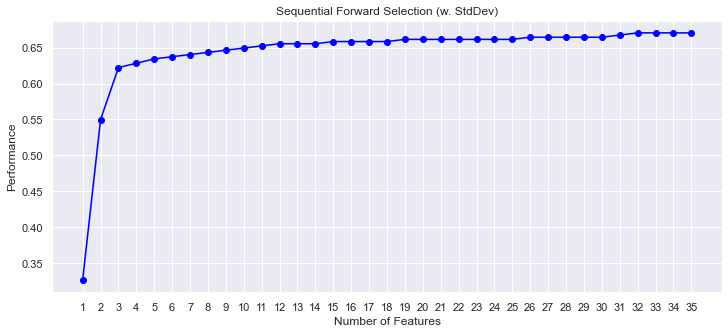

In [67]:
fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev',figsize=(12,5))
#plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
#plt.xticks(rotation=90)
plt.show()

**Most Important Features**

In [68]:
# Most important features
feat_cols = list(sfs.k_feature_idx_)
X_train.columns[feat_cols]

Index(['Family', 'Education', 'Income_log', 'ZIPCode_90007', 'ZIPCode_90009',
       'ZIPCode_90011', 'ZIPCode_90016', 'ZIPCode_90018', 'ZIPCode_90019',
       'ZIPCode_90024', 'ZIPCode_90025', 'ZIPCode_90027', 'ZIPCode_90028',
       'ZIPCode_90029', 'ZIPCode_90032', 'ZIPCode_90033', 'ZIPCode_90035',
       'ZIPCode_90036', 'ZIPCode_90037', 'ZIPCode_90041', 'ZIPCode_90044',
       'ZIPCode_90045', 'ZIPCode_90640', 'ZIPCode_90717', 'ZIPCode_91103',
       'ZIPCode_91129', 'ZIPCode_92106', 'ZIPCode_92182', 'ZIPCode_92626',
       'ZIPCode_92675', 'ZIPCode_93555', 'ZIPCode_94709', 'ZIPCode_94801',
       'ZIPCode_95032', 'ZIPCode_95758'],
      dtype='object')

**Retraining the model**

In [69]:
X_train_final = X_train[X_train.columns[feat_cols]]
X_test_final = X_test[X_train_final.columns]

In [70]:
# Create Logistic regression model ussing newton-cg solver
lg_final = LogisticRegression(solver='newton-cg',random_state=1)

# Fit the model with training data
model_final  = lg_final.fit(X_train_final,y_train)

**Performance**

In [71]:
# checking model performances for this model
scores_LR = metrics_score(model_final,X_train_final,X_test_final,y_train,y_test,model_name='SFS 35')
scores = scores.append(scores_LR, ignore_index=True)
scores

Model  Accuracy on training set  Accuracy on test set  \
0     Logistic Regression                  0.966000              0.950000   
1                 AUC-ROC                  0.886857              0.885333   
2  Precision-Recall Curve                  0.963714              0.942000   
3                  SFS 35                  0.956571              0.948667   

   Recall on training set  Recall on test set  Precision on training set  \
0                0.719033            0.597315                   0.901515   
1                0.960725            0.926174                   0.453638   
2                0.806647            0.651007                   0.809091   
3                0.670695            0.583893                   0.837736   

   Precision on test set  F1 on training set  F1 on test set  \
0               0.855769            0.800000        0.703557   
1               0.461538            0.616279        0.616071   
2               0.734848            0.807867        0.690391   
3               0.852941            0.744966        0.693227   

   ROC-AUC on training set  ROC-AUC Score on test set  
0                 0.855414                   0.793106  
1                 0.919933                   0.903502  
2                 0.893383                   0.812550  
3                 0.828563                   0.786395

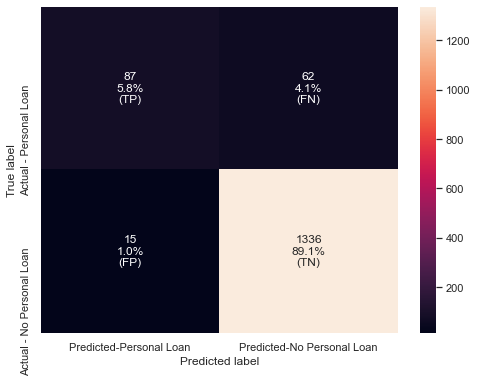

In [72]:
# creating confusion matrix
make_confusion_matrix(lg_final,X_test_final,y_test)

In [73]:
# Performances for this model with optimal AUC-ROC threshold
scores_LR = metrics_score(model_final,X_train_final,X_test_final,y_train,y_test,
                          threshold=optimal_threshold_auc_roc,model_name='SFS 35 - AUC-ROC')
scores = scores.append(scores_LR, ignore_index=True)

# Performances for this model with Precision-Recall curve threshold
scores_LR = metrics_score(model_final,X_train_final,X_test_final,y_train,y_test,
                          threshold=optimal_threshold_curve,model_name='SFS 35 - Precision-Recall Curve')
scores = scores.append(scores_LR, ignore_index=True)
scores

Model  Accuracy on training set  \
0              Logistic Regression                  0.966000   
1                          AUC-ROC                  0.886857   
2           Precision-Recall Curve                  0.963714   
3                           SFS 35                  0.956571   
4                 SFS 35 - AUC-ROC                  0.857143   
5  SFS 35 - Precision-Recall Curve                  0.952857   

   Accuracy on test set  Recall on training set  Recall on test set  \
0              0.950000                0.719033            0.597315   
1              0.885333                0.960725            0.926174   
2              0.942000                0.806647            0.651007   
3              0.948667                0.670695            0.583893   
4              0.856000                0.942598            0.892617   
5              0.946000                0.752266            0.684564   

   Precision on training set  Precision on test set  F1 on training set  \
0                   0.901515               0.855769            0.800000   
1                   0.453638               0.461538            0.616279   
2                   0.809091               0.734848            0.807867   
3                   0.837736               0.852941            0.744966   
4                   0.393443               0.399399            0.555160   
5                   0.750000               0.750000            0.751131   

   F1 on test set  ROC-AUC on training set  ROC-AUC Score on test set  
0        0.703557                 0.855414                   0.793106  
1        0.616071                 0.919933                   0.903502  
2        0.690391                 0.893383                   0.812550  
3        0.693227                 0.828563                   0.786395  
4        0.551867                 0.895408                   0.872289  
5        0.715789                 0.863037                   0.829699

### 7.4 Model Performance Summary

In [74]:
# print scores
scores

Model  Accuracy on training set  \
0              Logistic Regression                  0.966000   
1                          AUC-ROC                  0.886857   
2           Precision-Recall Curve                  0.963714   
3                           SFS 35                  0.956571   
4                 SFS 35 - AUC-ROC                  0.857143   
5  SFS 35 - Precision-Recall Curve                  0.952857   

   Accuracy on test set  Recall on training set  Recall on test set  \
0              0.950000                0.719033            0.597315   
1              0.885333                0.960725            0.926174   
2              0.942000                0.806647            0.651007   
3              0.948667                0.670695            0.583893   
4              0.856000                0.942598            0.892617   
5              0.946000                0.752266            0.684564   

   Precision on training set  Precision on test set  F1 on training set  \
0                   0.901515               0.855769            0.800000   
1                   0.453638               0.461538            0.616279   
2                   0.809091               0.734848            0.807867   
3                   0.837736               0.852941            0.744966   
4                   0.393443               0.399399            0.555160   
5                   0.750000               0.750000            0.751131   

   F1 on test set  ROC-AUC on training set  ROC-AUC Score on test set  
0        0.703557                 0.855414                   0.793106  
1        0.616071                 0.919933                   0.903502  
2        0.690391                 0.893383                   0.812550  
3        0.693227                 0.828563                   0.786395  
4        0.551867                 0.895408                   0.872289  
5        0.715789                 0.863037                   0.829699

- AUC-ROC model improves Recall on training and test sets but reduces Precision and f1 scores
- Precision-Recall Curve model has similar values for Accuary and f1 scores than original model, and improves Recall and Precision metrics
- SFS 35 model has similar performance metrics than original model with only 7.3% of the original variables
- From this model we found that `Family`, `Education`, `Income_log`, and some `ZIP Codes` are the most important variables 
- Using the same thresholds found in AUC-ROC and Precision-Recall curve models give similar results in the SFS 35 models

## 8 Decision Tree

### 8.1 Creating training and test data sets

We are going to use the original dataset for the decision tree model

In [75]:
# read data from csv file
data_dt = pd.read_csv('Loan_Modelling.csv')

In [76]:
data_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [77]:
# Drop ID column
data_dt.drop(['ID'], axis=1, inplace=True)
# Change ZIPCode as categorical
data_dt['ZIPCode']=data_dt['ZIPCode'].astype('category')

In [78]:
# create independent variables
X = data_dt.drop(['Personal_Loan'], axis=1)
# create dependent variable
Y = data_dt['Personal_Loan']

# hot encoding for categorical variables
X = pd.get_dummies(X,drop_first=True)

In [79]:
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

In [80]:
print(f'Shape of Training set: {X_train.shape}')
print(f'Shape of Test set: {X_test.shape}')
print(f'Percentage of classes in Training set\n{y_train.value_counts(normalize=True)}')
print(f'Percentage of classes in Test set\n{y_test.value_counts(normalize=True)}')

Shape of Training set: (3500, 477)
Shape of Test set: (1500, 477)
Percentage of classes in Training set
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in Test set
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


### 8.2 Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function, and using default 'gini' criteria to split
* The decision tree will give more weight to class 1 since our goal is to identify correctly customers with Personal Loan (class 1). We are going to pass a dictionary {0:0.1,1:0.9} to the hyperparameter class_weight to specify the weight of each class

In [81]:
dt = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.1, 1: 0.9}, random_state=1
)
model_dt = dt.fit(X_train, y_train)

In [82]:
# checking model performances for this model
scores_DT = metrics_score(model_dt,X_train,X_test,y_train,y_test,model_name='Decision Tree')
scores_DT = pd.DataFrame(scores_DT,index=[0])
scores_DT

Model  Accuracy on training set  Accuracy on test set  \
0  Decision Tree                       1.0              0.972667   

   Recall on training set  Recall on test set  Precision on training set  \
0                     1.0            0.865772                        1.0   

   Precision on test set  F1 on training set  F1 on test set  \
0                   0.86                 1.0        0.862876   

   ROC-AUC on training set  ROC-AUC Score on test set  
0                      1.0                   0.925114

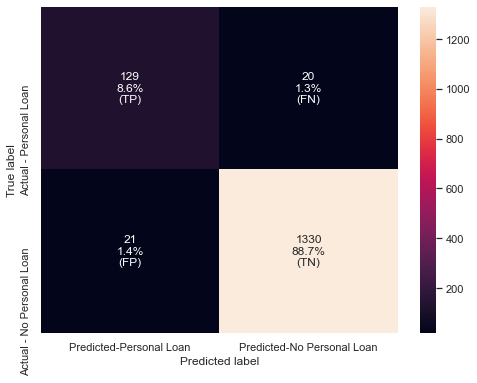

In [83]:
# creating confusion matrix
make_confusion_matrix(dt,X_test,y_test)

- In this first model we have a overfitting problem. All measures (Accuracy, Recall, Precision, f1-value, ROC-AUC) are equal to 1 in the training set, but they lower than 1 in the test set

### 8.3 Visualizing the Decision Tree

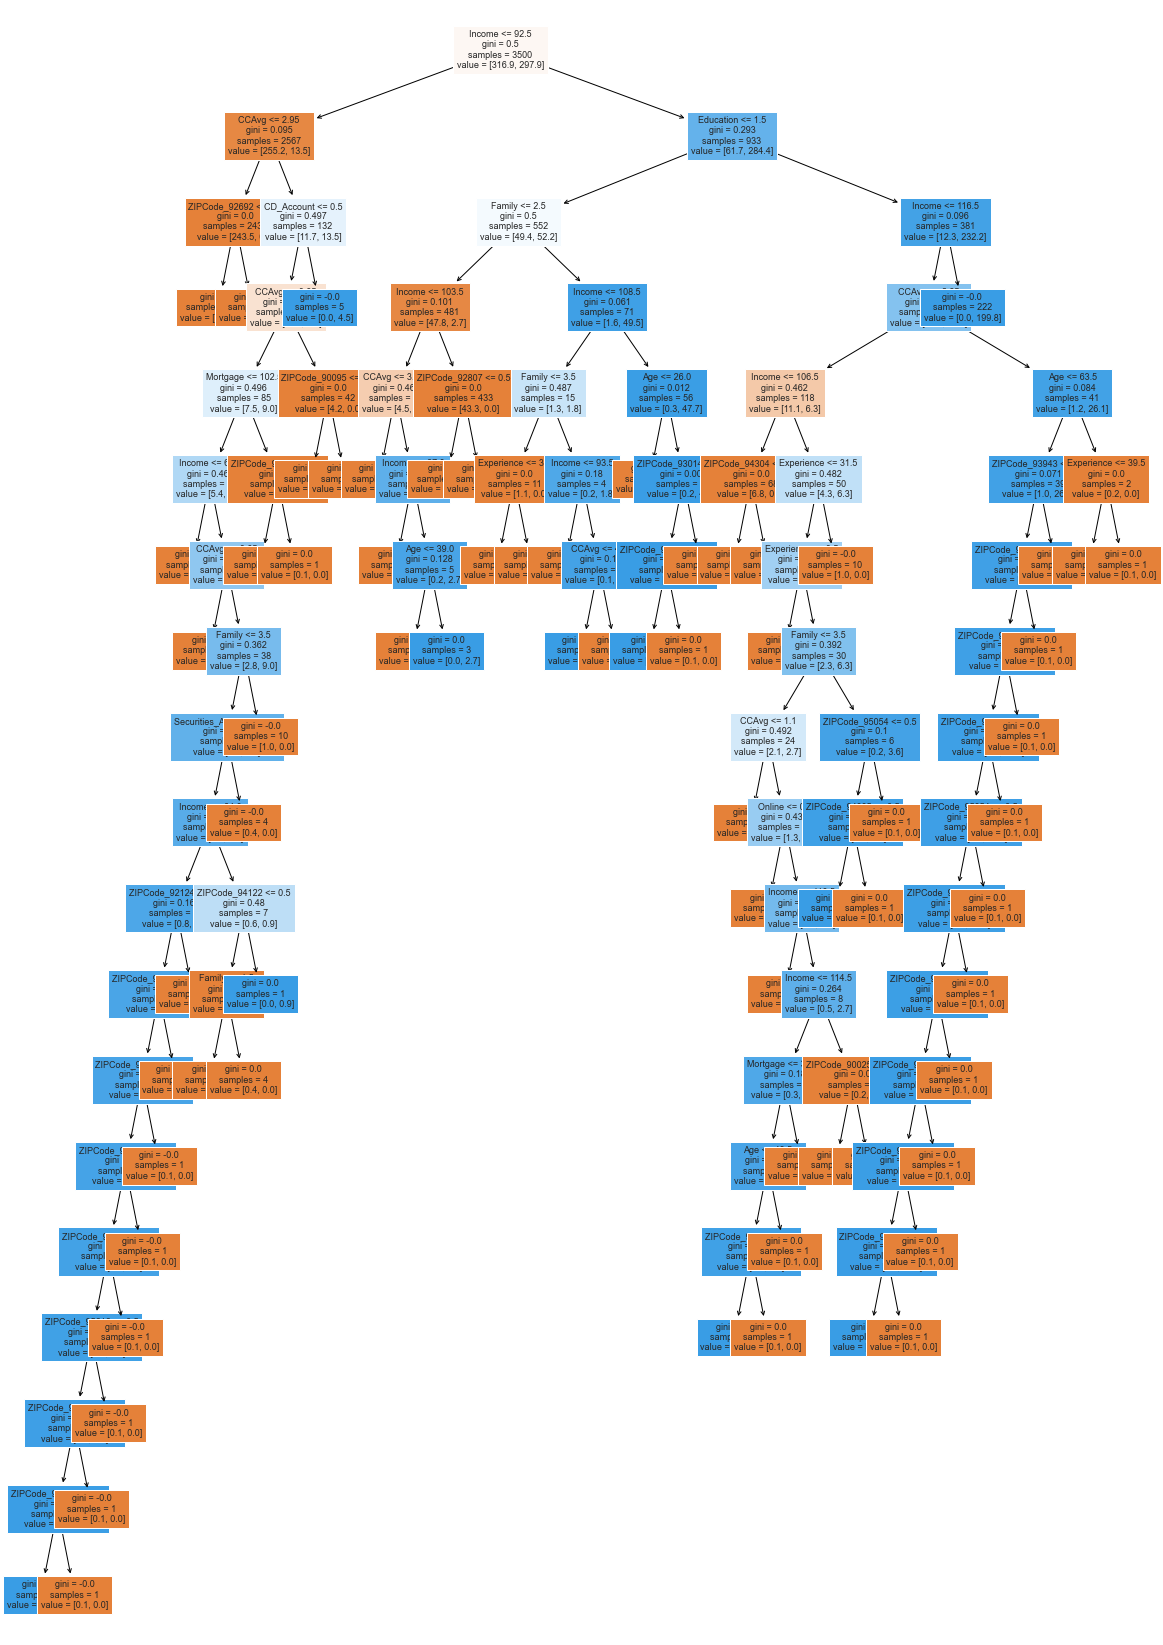

In [84]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model_dt,
    feature_names=X.columns,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [85]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model_dt, feature_names=X.columns.tolist(), show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- ZIPCode_92692 <= 0.50
|   |   |   |--- weights: [243.20, 0.00] class: 0
|   |   |--- ZIPCode_92692 >  0.50
|   |   |   |--- weights: [0.30, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [1.10, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode_92124 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode_9212

### 8.4 Important features

In [86]:
# importance of features in the tree building
impor_fea = pd.DataFrame( model_dt.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False)
impor_fea = impor_fea.reset_index()
impor_fea.head(20)

index       Imp
0               Income  0.632163
1               Family  0.148481
2            Education  0.088820
3                CCAvg  0.088234
4           CD_Account  0.007690
5           Experience  0.005671
6             Mortgage  0.005208
7                  Age  0.003641
8        ZIPCode_94122  0.002344
9   Securities_Account  0.001879
10              Online  0.001696
11       ZIPCode_95616  0.001242
12       ZIPCode_95054  0.001225
13       ZIPCode_90007  0.000650
14       ZIPCode_95035  0.000649
15       ZIPCode_93014  0.000647
16       ZIPCode_90245  0.000644
17       ZIPCode_90274  0.000643
18       ZIPCode_93460  0.000639
19       ZIPCode_91902  0.000634

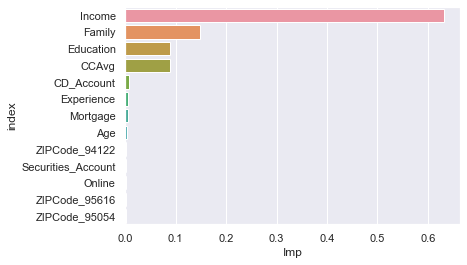

In [87]:
sns.barplot(x='Imp', y='index', data=impor_fea[impor_fea['Imp']>0.001]);

- Income, Family, Education and CCAVG are the most important features for a customer having a Personal Loan

### 8.5 Model Improvement
#### 8.5.1 Grid search
We are going to use Grid search to compute the optimal values of hyperparameters in order to reduce over-fitting in the Decision Tree model

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1) #, class_weight={0: 0.1, 1: 0.9})

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(3, 7),
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
    "max_features": ["log2", "sqrt"],
    "class_weight": [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}]
}

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring="recall", cv=5, verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=6, max_features='sqrt',
                       min_impurity_decrease=1e-06, random_state=1)

In [90]:
# checking model performances for this model
scores_GV = metrics_score(estimator,X_train,X_test,y_train,y_test,model_name='Grid Search')
scores_DT = scores_DT.append(scores_GV, ignore_index=True)
scores_DT

Model  Accuracy on training set  Accuracy on test set  \
0  Decision Tree                  1.000000              0.972667   
1    Grid Search                  0.860286              0.842000   

   Recall on training set  Recall on test set  Precision on training set  \
0                 1.00000            0.865772                   1.000000   
1                 0.73716            0.651007                   0.377709   

   Precision on test set  F1 on training set  F1 on test set  \
0               0.860000            1.000000        0.862876   
1               0.343972            0.499488        0.450116   

   ROC-AUC on training set  ROC-AUC Score on test set  
0                 1.000000                   0.925114  
1                 0.805153                   0.757036

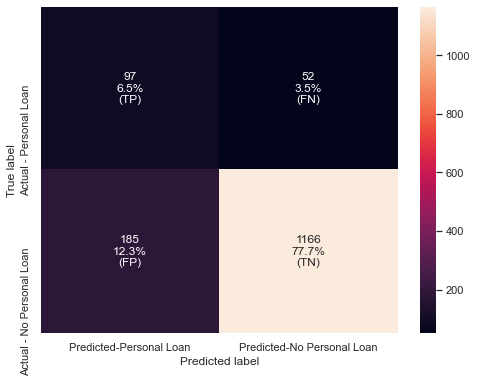

In [91]:
# creating confusion matrix
make_confusion_matrix(estimator,X_test,y_test)

- Now the model is not over-fitting but Recall in the new model is lower than the original Decision Tree

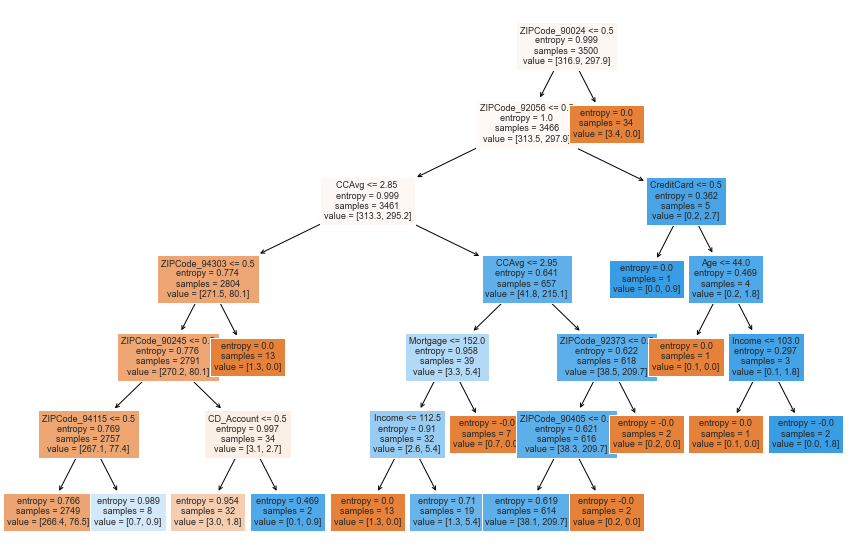

In [92]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=X.columns,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [93]:
# importance of features in the tree building
impor_fea = pd.DataFrame( estimator.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False)
impor_fea = impor_fea.reset_index()
impor_fea.head(20)

index       Imp
0           CCAvg  0.925649
1   ZIPCode_90024  0.017454
2          Income  0.016512
3   ZIPCode_92056  0.010436
4   ZIPCode_90245  0.006156
5        Mortgage  0.005631
6      CD_Account  0.003903
7   ZIPCode_94115  0.003301
8   ZIPCode_90405  0.002886
9   ZIPCode_92373  0.002879
10  ZIPCode_94303  0.002599
11            Age  0.001994
12     CreditCard  0.000599
13  ZIPCode_93106  0.000000
14  ZIPCode_94501  0.000000
15  ZIPCode_94402  0.000000
16  ZIPCode_94309  0.000000
17  ZIPCode_94306  0.000000
18  ZIPCode_94305  0.000000
19  ZIPCode_94304  0.000000

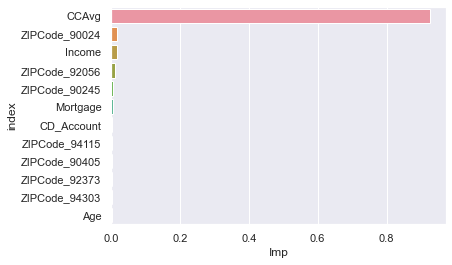

In [94]:
sns.barplot(x='Imp', y='index', data=impor_fea[impor_fea['Imp']>0.001]);

- In the new model CCAvg is the most important feature

#### 8.5.2  Cost Complexity Pruning
Now we are going to improve and reduce the complexity of the Decision Tree using cost complexity pruning identifying the optimal `ccp_alpha` parameter


In [95]:
# Define Decision Tree and identify pairs of ccp_alphas and impurities
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.1, 1: 0.9})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

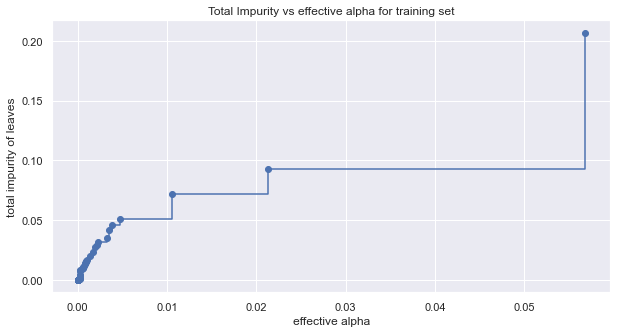

In [96]:
# Graph of Total Impurity vs effective alpha for training set
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

We are going to train a decision tree using the effective alphas

In [97]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.1, 1: 0.9})
    clf.fit(X_train, y_train)
    clfs.append(clf)

Now, we are going to analyze how the number of nodes and depth of tree reduces with higher alphas

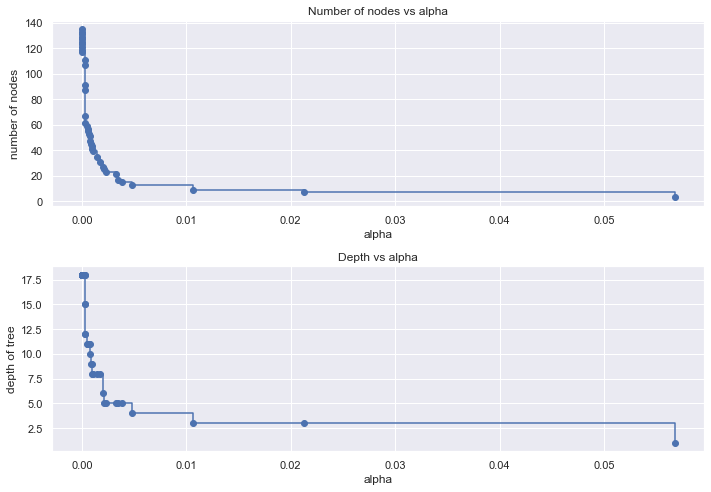

In [98]:
# Graphs of Number of Nodes and Depth of tree vs alpha
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Now, we are going to compute the Recall value for train and test sets for each one of the different Decision Trees associated with each alpha

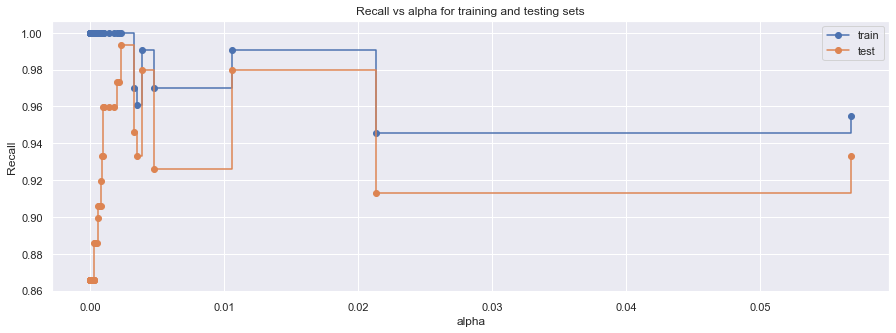

In [99]:
# Get Recall scores for Train set
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

# Get Recall scores for Test set
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

# Create Lists with Recall scores
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Plot Recall Scores vs alpha
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Now, lets calculate the alpha that gives the maximum Recall score in the test set and save the correspondent Decision Tree

In [100]:
# Model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0023289170166201686,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)


In [101]:
# Train the best model
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0023289170166201686,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)

In [102]:
# checking model performances for this model
scores_GV = metrics_score(best_model,X_train,X_test,y_train,y_test,model_name='Alpha')
scores_DT = scores_DT.append(scores_GV, ignore_index=True)
scores_DT

Model  Accuracy on training set  Accuracy on test set  \
0  Decision Tree                  1.000000              0.972667   
1    Grid Search                  0.860286              0.842000   
2          Alpha                  0.956857              0.948667   

   Recall on training set  Recall on test set  Precision on training set  \
0                 1.00000            0.865772                   1.000000   
1                 0.73716            0.651007                   0.377709   
2                 1.00000            0.993289                   0.686722   

   Precision on test set  F1 on training set  F1 on test set  \
0               0.860000            1.000000        0.862876   
1               0.343972            0.499488        0.450116   
2               0.660714            0.814268        0.793566   

   ROC-AUC on training set  ROC-AUC Score on test set  
0                 1.000000                   0.925114  
1                 0.805153                   0.757036  
2                 0.976175                   0.968517

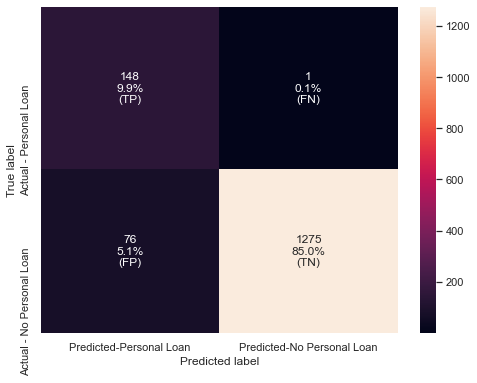

In [103]:
# creating confusion matrix
make_confusion_matrix(best_model,X_test,y_test)

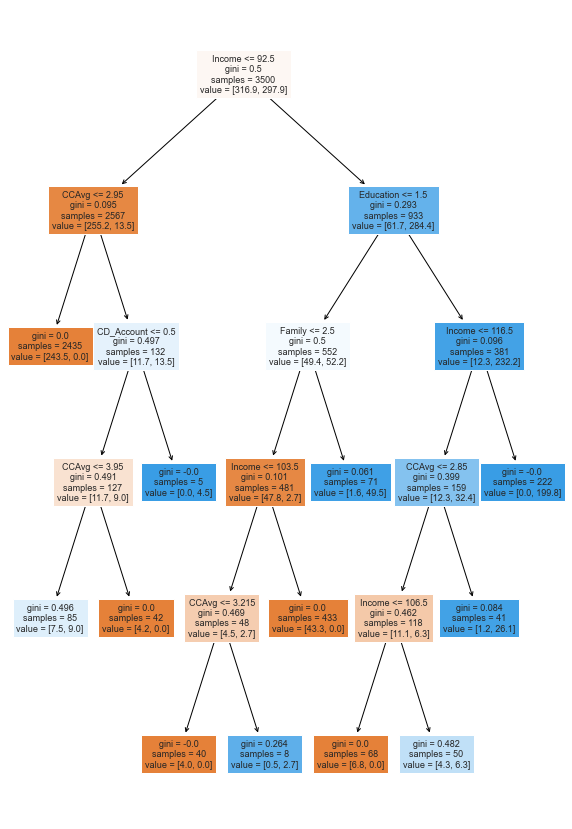

In [104]:
# Plot Decision Tree
plt.figure(figsize=(10, 15))
out = tree.plot_tree(
    best_model,
    feature_names=X.columns,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [105]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=X.columns.tolist()))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |--- class: 1
|   |   |   |--- Income >  103.50
|   |   |   |   |--- class: 0
|   |   |--- Family >  2.50
|   |   |   |--- class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.85
|   |   |   |   |--- Income <= 106.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Income >  106.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- CCAvg >  2.85
|   |   |   |   |--- class: 1
|   |   |--- Income >  116.50
|   |   | 

In [106]:
# importance of features in the tree building
impor_fea = pd.DataFrame( best_model.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False)
impor_fea = impor_fea.reset_index()
impor_fea.head(20)

index       Imp
0          Income  0.661588
1          Family  0.147962
2       Education  0.094853
3           CCAvg  0.087384
4      CD_Account  0.008213
5             Age  0.000000
6   ZIPCode_94301  0.000000
7   ZIPCode_94126  0.000000
8   ZIPCode_94131  0.000000
9   ZIPCode_94132  0.000000
10  ZIPCode_94143  0.000000
11  ZIPCode_94234  0.000000
12  ZIPCode_94304  0.000000
13  ZIPCode_94302  0.000000
14  ZIPCode_94303  0.000000
15  ZIPCode_94123  0.000000
16  ZIPCode_94305  0.000000
17  ZIPCode_94306  0.000000
18  ZIPCode_94124  0.000000
19  ZIPCode_94117  0.000000

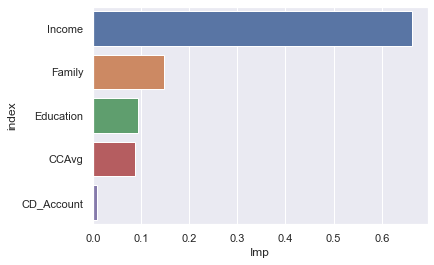

In [107]:
sns.barplot(x='Imp', y='index', data=impor_fea[impor_fea['Imp']>0.001]);

- The most important features in this model are Income, Family, Education, CCAvg and CD_Account

### 8.6 Model Performance Summary

In [108]:
# Print scores for the different Decision Tree models
scores_DT

Model  Accuracy on training set  Accuracy on test set  \
0  Decision Tree                  1.000000              0.972667   
1    Grid Search                  0.860286              0.842000   
2          Alpha                  0.956857              0.948667   

   Recall on training set  Recall on test set  Precision on training set  \
0                 1.00000            0.865772                   1.000000   
1                 0.73716            0.651007                   0.377709   
2                 1.00000            0.993289                   0.686722   

   Precision on test set  F1 on training set  F1 on test set  \
0               0.860000            1.000000        0.862876   
1               0.343972            0.499488        0.450116   
2               0.660714            0.814268        0.793566   

   ROC-AUC on training set  ROC-AUC Score on test set  
0                 1.000000                   0.925114  
1                 0.805153                   0.757036  
2                 0.976175                   0.968517

- The original Decision Tree model is over-fitting. The scores are 1 for the training set but much lower in the test set
- Grid Search model does not over-fit. However, the overall performance is not good. Recall score in the test set is 0.65, and the number of False Negatives is still high
- Alpha model presents best results. The Recall score on test set is 0.99, and there is only 1 False Negative. 

## 9 Comparison Logistic Regression and Decision Tree
Now, we are going to compare the results for all models

In [109]:
# Print scores Logistic Models
scores

Model  Accuracy on training set  \
0              Logistic Regression                  0.966000   
1                          AUC-ROC                  0.886857   
2           Precision-Recall Curve                  0.963714   
3                           SFS 35                  0.956571   
4                 SFS 35 - AUC-ROC                  0.857143   
5  SFS 35 - Precision-Recall Curve                  0.952857   

   Accuracy on test set  Recall on training set  Recall on test set  \
0              0.950000                0.719033            0.597315   
1              0.885333                0.960725            0.926174   
2              0.942000                0.806647            0.651007   
3              0.948667                0.670695            0.583893   
4              0.856000                0.942598            0.892617   
5              0.946000                0.752266            0.684564   

   Precision on training set  Precision on test set  F1 on training set  \
0                   0.901515               0.855769            0.800000   
1                   0.453638               0.461538            0.616279   
2                   0.809091               0.734848            0.807867   
3                   0.837736               0.852941            0.744966   
4                   0.393443               0.399399            0.555160   
5                   0.750000               0.750000            0.751131   

   F1 on test set  ROC-AUC on training set  ROC-AUC Score on test set  
0        0.703557                 0.855414                   0.793106  
1        0.616071                 0.919933                   0.903502  
2        0.690391                 0.893383                   0.812550  
3        0.693227                 0.828563                   0.786395  
4        0.551867                 0.895408                   0.872289  
5        0.715789                 0.863037                   0.829699

In [110]:
# print scores Decision Tree
scores_DT

Model  Accuracy on training set  Accuracy on test set  \
0  Decision Tree                  1.000000              0.972667   
1    Grid Search                  0.860286              0.842000   
2          Alpha                  0.956857              0.948667   

   Recall on training set  Recall on test set  Precision on training set  \
0                 1.00000            0.865772                   1.000000   
1                 0.73716            0.651007                   0.377709   
2                 1.00000            0.993289                   0.686722   

   Precision on test set  F1 on training set  F1 on test set  \
0               0.860000            1.000000        0.862876   
1               0.343972            0.499488        0.450116   
2               0.660714            0.814268        0.793566   

   ROC-AUC on training set  ROC-AUC Score on test set  
0                 1.000000                   0.925114  
1                 0.805153                   0.757036  
2                 0.976175                   0.968517

- The best Logistic Regression model is AUC-ROC. The Recall score on test set is 0.92 with 11 False Negatives
- The best Decision Tree model is Alpha. The Recall score on test set is 0.99 with only 1 False Negative
- The Alpha model also has better Accuracy, Precision, f1-value and ROC-AUC scores compared with AUC-ROC
- `We recommend to use the Alpha model because the rules in the Decision Tree are simple, there is no need of transform variables, and the model can handle outliers`

## 10 Exploratory Data Analysis on the incorrectly predicted data

In [111]:
# We are going to get the predicted values for the best model (Alpha)
y_predicted = (best_model.predict_proba(X_test)[:,1]>0.5)
# Subset of incorrectly predicted data
data_incorrect = data_dt.iloc[y_test[y_predicted!=y_test].index]

In [112]:
data_incorrect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 932 to 829
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 77 non-null     int64   
 1   Experience          77 non-null     int64   
 2   Income              77 non-null     int64   
 3   ZIPCode             77 non-null     category
 4   Family              77 non-null     int64   
 5   CCAvg               77 non-null     float64 
 6   Education           77 non-null     int64   
 7   Mortgage            77 non-null     int64   
 8   Personal_Loan       77 non-null     int64   
 9   Securities_Account  77 non-null     int64   
 10  CD_Account          77 non-null     int64   
 11  Online              77 non-null     int64   
 12  CreditCard          77 non-null     int64   
dtypes: category(1), float64(1), int64(11)
memory usage: 27.8 KB


- There are 77 rows with incorrect prediction

In [113]:
data_incorrect.describe()

Age  Experience      Income     Family      CCAvg  Education  \
count  77.000000   77.000000   77.000000  77.000000  77.000000  77.000000   
mean   46.363636   21.272727   90.597403   2.376623   3.120779   1.883117   
std    11.033334   10.762552   17.610747   1.076531   1.329359   0.902832   
min    25.000000    1.000000   51.000000   1.000000   0.500000   1.000000   
25%    39.000000   14.000000   79.000000   1.000000   2.500000   1.000000   
50%    48.000000   23.000000   94.000000   2.000000   3.300000   2.000000   
75%    55.000000   29.000000  105.000000   3.000000   3.800000   3.000000   
max    66.000000   41.000000  114.000000   4.000000   6.300000   3.000000   

         Mortgage  Personal_Loan  Securities_Account  CD_Account     Online  \
count   77.000000      77.000000           77.000000   77.000000  77.000000   
mean    52.363636       0.012987            0.155844    0.038961   0.558442   
std     99.253783       0.113961            0.365086    0.194771   0.499829   
min      0.000000       0.000000            0.000000    0.000000   0.000000   
25%      0.000000       0.000000            0.000000    0.000000   0.000000   
50%      0.000000       0.000000            0.000000    0.000000   1.000000   
75%     76.000000       0.000000            0.000000    0.000000   1.000000   
max    389.000000       1.000000            1.000000    1.000000   1.000000   

       CreditCard  
count   77.000000  
mean     0.324675  
std      0.471324  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

In [114]:
# get pandas profiling report
pandas_profiling.ProfileReport(data_incorrect)

### 10.1 Decision Tree Rules

Since the number of rows with incorrect prediction is small. We are going to use the Decision Tree rules to analyze these values

In [115]:
#########Rules with class 1

# |--- Income <= 92.50
# |   |--- CCAvg >  2.95
# |   |   |--- CD_Account <= 0.50
# |   |   |   |--- CCAvg <= 3.95
# |   |   |   |   |--- class: 1
# |   |   |--- CD_Account >  0.50
# |   |   |   |--- class: 1
# |--- Income >  92.50
# |   |--- Education <= 1.50
# |   |   |--- Family <= 2.50
# |   |   |   |--- Income <= 103.50
# |   |   |   |   |--- CCAvg >  3.21
# |   |   |   |   |   |--- class: 1
# |   |   |--- Family >  2.50
# |   |   |   |--- class: 1
# |   |--- Education >  1.50
# |   |   |--- Income <= 116.50
# |   |   |   |--- CCAvg <= 2.85
# |   |   |   |   |--- Income >  106.50
# |   |   |   |   |   |--- class: 1
# |   |   |   |--- CCAvg >  2.85
# |   |   |   |   |--- class: 1
# |   |   |--- Income >  116.50
# |   |   |   |--- class: 1

# create different rules fors data_incorrect
rule1 = (data_incorrect['Income']<=92.5) & (data_incorrect['CCAvg']>2.95) & (data_incorrect['CD_Account']<=0.5) &  (data_incorrect['CCAvg']<=3.95)
rule2 = (data_incorrect['Income']<=92.5) & (data_incorrect['CCAvg']>2.95) & (data_incorrect['CD_Account']>0.5)
rule3 = (data_incorrect['Income']>92.5) & (data_incorrect['Education']<=1.5) & (data_incorrect['Family']<=2.5) & (data_incorrect['Income']<=103.5) & (data_incorrect['CCAvg']>3.21)
rule4 = (data_incorrect['Income']>92.5) & (data_incorrect['Education']<=1.5) & (data_incorrect['Family']>2.5)
rule5 = (data_incorrect['Income']>106.5) & (data_incorrect['Education']>1.5) & (data_incorrect['Income']<=116.5) & (data_incorrect['CCAvg']<=2.85)
rule6 = (data_incorrect['Income']>92.5) & (data_incorrect['Education']>1.5) & (data_incorrect['Income']<=116.5) & (data_incorrect['CCAvg']>2.85)               
rule7 = (data_incorrect['Income']>116.5) & (data_incorrect['Education']>1.5) 
    
# create column with rules
data_incorrect['Rule'] = 'FP'
data_incorrect['Rule'][rule1] = 'rule1'
data_incorrect['Rule'][rule2] = 'rule2'
data_incorrect['Rule'][rule3] = 'rule3'
data_incorrect['Rule'][rule4] = 'rule4'
data_incorrect['Rule'][rule5] = 'rule5'
data_incorrect['Rule'][rule6] = 'rule6'
data_incorrect['Rule'][rule7] = 'rule7'

In [116]:
# function to calculate percentage on countplot
def perc_on_bar(plot, feature):
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show() 

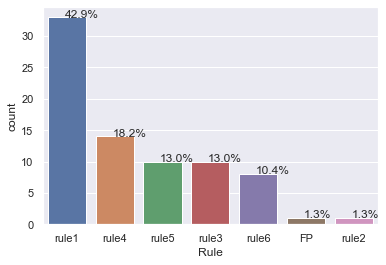

In [117]:
ax = sns.countplot(x = 'Rule',
              data = data_incorrect,
              order = data_incorrect['Rule'].value_counts().index)
perc_on_bar(ax, data_incorrect["Rule"])

- 42.9% of customers belongs to Rule 1. Decision Tree incorrectly predict that those customers have a Personal Loan:
    - Income is lower than 92.5
    - without a CD Account
    - Credit card spending between 2.95 and 3.95

- 18.2% of customers belongs to Rule 4. Decision Tree incorrectly predict that those customers have a Personal Loan:
    - Income is higher than 92.5
    - Undergrad as Education level 
    - Family size is higher than 2

- 13% of customers belongs to Rule 3. Decision Tree incorrectly predict that those customers have a Personal Loan:
    - Income is between 92.5 and 103.5
    - Undergrad as Education level
    - Family size is lower than 3
    - Credit Card spending is higher than 3.21

- 13% of customers belongs to Rule 5. Decision Tree incorrectly predict that those customers have a Personal Loan:
    - Income is between than 106.5 and 116.5
    - Graduate and Advanced/Professional as Education level 
    - Credit Card spending is lower than 2.85

- 10.4% of customers belongs to Rule 6. Decision Tree incorrectly predict that those customers have a Personal Loan:
    - Income is between than 92.5 and 116.5
    - Graduate and Advanced/Professional as Education level 
    - Credit Card spending is higher than 2.85

- There is only 1 customer in Rule 2 and one False Negative

## 11 Conclusions and Advice to grow business
- AllLife Bank should use the Decision Tree model with alpha tunning because it gives better results than the other Decision Tree and Logistic Regression models
- The Decision Tree model with alpha tunning model accurately predict customers with Personal Loan 
- AllLife Bank should target the following 7 groups of customers in order to grow the Personal Loan business:
    - **Group 1**
        - Income lower than 92.5
        - without a CD Account
        - Credit card spending between 2.95 and 3.95

    - **Group 2**
        - Income lower than 92.5
        - with a CD Account 
        - Credit card spending higher than 2.95
    
    - **Group 3** 
        - Income between 92.5 and 103.5
        - Undergrad as Education level
        - Family size lower than 3
        - Credit Card spending higher than 3.21
    
    - **Group 4**
        - Income higher than 92.5
        - Undergrad as Education level
        - Family size higher than 2

    - **Group 5**
        - Income between than 106.5 and 116.5
        - Graduate and Advanced/Professional as Education level
        - Credit Card spending is lower than 2.85

    - **Group 6**
        - Income between than 92.5 and 116.5
        - Graduate and Advanced/Professional as Education level
        - Credit Card spending higher than 2.85
    
    - **Group 7**
        - Income higher than 116.5
        - Graduate and Advanced/Professional as Education level